# House Price Prediction

## Objective: Use ML to predict the price of houses based on features.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train.csv
/kaggle/input/sample_submission.csv
/kaggle/input/test.csv
/kaggle/input/data_description.txt


In [2]:
train=pd.read_csv('/kaggle/input/train.csv')
test=pd.read_csv('/kaggle/input/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Let's checkout the shape of each dataset.

In [5]:
print('Train shape: {}'.format(train.shape))
print('Test shape: {}'.format(test.shape))

Train shape: (1460, 81)
Test shape: (1459, 80)


In [6]:
full_data=pd.concat([train.iloc[:,:-1],test],axis=0)
print('Full data shape: {}'.format(full_data.shape))

Full data shape: (2919, 80)


Let's check if our data have NaN values.

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

Ok, as we can see there's some columns with NaN values, so let's clean that up and remove columns that we are not gonna use it.

## Cleaning the Data

So, to clean our data here, we have some options:<br>
1. We can replace the NaN values with the mean or most frequency occurency.
2. Drop the NaN rows.
3. Leave it as it is.<br><br>
Im gonna choose option number 1.

First we are gonna take all columns and separate them in numerical and object.

In [8]:
object_list=list(full_data.select_dtypes(include=['object']).columns)
numerical_list=list(full_data.select_dtypes(include=['float64','int64']).columns)
print('Object list: {}\n\n\nNumerical list: {}'.format(object_list,numerical_list))

Object list: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Numerical list: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',

Now let's replace the NaN values with the mean and most frequency occurency.

In [9]:
cleaned_data=full_data[numerical_list].apply(lambda x: x.fillna(x.mean()),axis=0)
cleaned_data[object_list]=full_data[object_list].apply(lambda x: x.fillna(x.value_counts().idxmax()),axis=0)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2919 non-null float64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
LowQualFinSF     2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-

Done, we replaced every NaN value with his respective mean and most frequency occurency.<br>
Now let's check our data with the describe function

In [10]:
cleaned_data[object_list].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2269,2907,2841,1859,2622,2918,2133,2778,443,2511,...,1880,1389,2763,2813,2641,2913,2677,2909,2526,2402


In [11]:
cleaned_data[numerical_list].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,...,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Dropping every column that we are not gonna use it.

In [12]:
cleaned_data.drop(['Id','Street','PoolQC','Utilities'],axis=1,inplace=True)
cleaned_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,Gd,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,Gd,Detchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal


Passing all the objects to dummies.

In [13]:
object_list.remove('Street')
object_list.remove('PoolQC')
object_list.remove('Utilities')

In [14]:
print(cleaned_data.shape)
dummies_df=pd.get_dummies(cleaned_data[object_list])
cleaned_data.drop(object_list,inplace=True,axis=1)
print(cleaned_data.shape)

(2919, 76)
(2919, 36)


In [15]:
cleaned_data=pd.concat([cleaned_data,dummies_df],axis=1)
cleaned_data.shape

(2919, 281)

Now let's split back to respective train and test set.

In [16]:
train_data=cleaned_data.iloc[:1459,:]
test_data=cleaned_data.iloc[1459:,:]
print('Train data shape: {}\nTest data shape: {}'.format(train_data.shape,test_data.shape))

Train data shape: (1459, 281)
Test data shape: (1460, 281)


#### Ok, we already have our data already cleaned, now let's check the correlation and how certain features and target look like.

## Checking outliers and transforming

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Let's check the target distribution and see how it looks like.

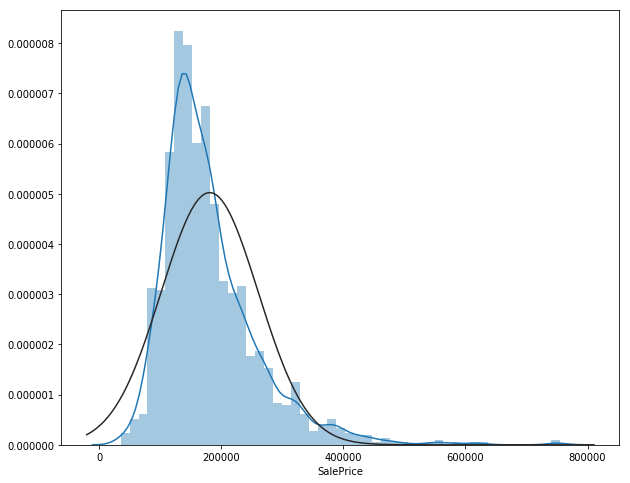

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(train['SalePrice'],fit=stats.norm)

Ok, so if we check this follows a log10 distribution having a long tail, i'm gonna transform this using log10 so when we use correlation to check which features have the higher correlation values it doesn't get influenced by outliers, peak of distribution, etc.

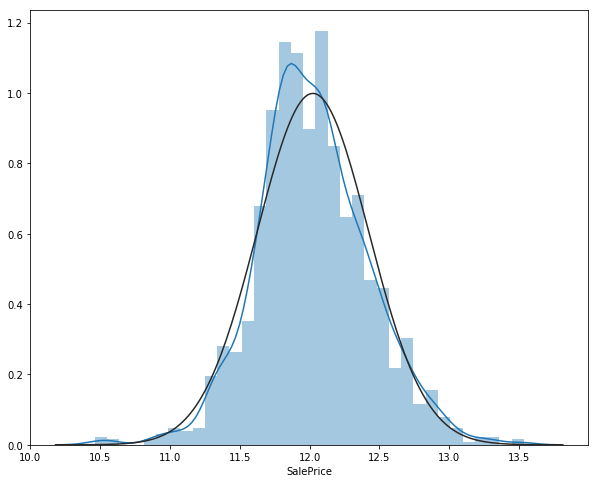

In [19]:
plt.figure(figsize=(10,8))
SalePricelog=np.log1p(train['SalePrice'])
sns.distplot(SalePricelog,fit=stats.norm)

Our target it's clearly better looking, now let's check the correlation between the features and the target.

In [20]:
correlation_target=pd.concat([train_data,SalePricelog],axis=1).corr()
correlation_target=abs(correlation_target['SalePrice'])
relevant_features=correlation_target[correlation_target>=0.5]
relevant_features.sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.817221
GrLivArea           0.700904
GarageCars          0.680677
GarageArea          0.650904
TotalBsmtSF         0.612292
1stFlrSF            0.597063
ExterQual_TA        0.596504
FullBath            0.594789
YearBuilt           0.586554
GarageFinish_Unf    0.574944
YearRemodAdd        0.565603
BsmtQual_TA         0.538393
KitchenQual_TA      0.538228
TotRmsAbvGrd        0.534391
Foundation_PConc    0.530815
ExterQual_Gd        0.510337
GarageYrBlt         0.501609
Name: SalePrice, dtype: float64

As we can see theres some features that if we use the absolute value we have some moderate to high correlation between the target and the features.

Now that we know something about the data, let's create our prediction model but first i'm gonna scale and standardize, so here we go.

## Scaling and Standardizing the features

In [21]:
X=train_data
y=SalePricelog[:1459]

In [22]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Scaling the features
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X)
X_test_scaled=scaler.fit_transform(test_data)

# Standardize them so we don't get influenced by outliers
stand=RobustScaler()
X_train_stand=stand.fit_transform(X_train_scaled)
X_test_stand=stand.fit_transform(X_test_scaled)

## Creating our model

Here we are gonna create our model using a LASSO regression, create a pipeline and finding the best estimator to our model using a GridSearchCV.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Throwing some random values for alpha
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}

# Creating our pipeline and finding the best estimator
# Note: When refit=True, the GridSearchCV will be refitted with the best scoring parameter 
# combination on the whole data that is passed in fit().
model=make_pipeline(GridSearchCV(Lasso(random_state=42),parameters,cv=5,refit=True))
model.fit(X_train_stand,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.183022314475586, tolerance: 0.018911155876276974
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.512164967851914, tolerance: 0.01800070908464661
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.306201492479214, tolerance: 0.018372185045774262
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.258690

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=42,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                              iid='warn', n_jobs=None,
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001,
                                                    0.01, 1, 5, 10, 20]},
                              pre_dispatch='2*n_jobs', refit=True,
                              return_train_score=False, scoring=None,
                              verbose=0))],
         verbose=False)

In [24]:
print('R^2 train set: {}'.format(model.score(X_train_stand,y)))
print('Cross-Validation score mean: {}'.format(cross_val_score(model,X_test_stand,model.predict(X_test_stand),cv=5).mean()))

R^2 train set: 0.9398354029346017


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Cross-Validation score mean: 0.9998730890698642


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


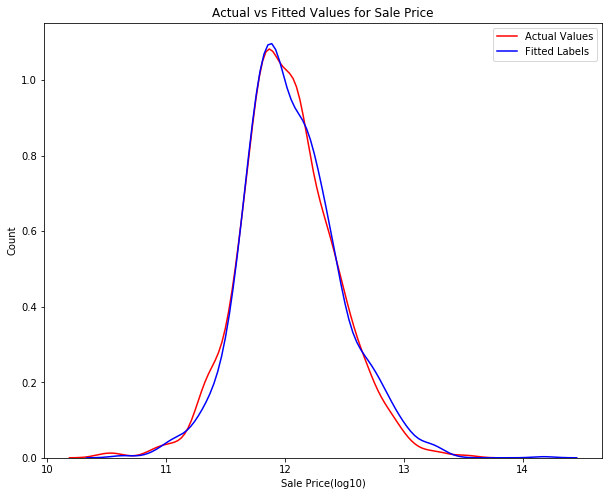

In [28]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y,hist=False,color='r',label='Actual Values')
sns.distplot(model.predict(X_test_stand),hist=False,color='b',label='Fitted Labels',ax=ax1)
plt.title('Actual vs Fitted Values for Sale Price')
plt.xlabel('Sale Price(log10)')
plt.ylabel('Count')
plt.show()

## Conclusion: As we can see we got a cool high score and validation mena with our model, obviosly there's somethings that we can improve in our model and dataset but i'll keep it that way so if someone with more knowledge can correct or improve some parts that maybe i gotted it wrong.